In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

DATA SOURCE:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
D

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition



In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#I have not so good internet connection, and my laptop is quite old for big calculations, so
#it took a lot af time to batch resize all images from their original size to 150*150
#also i decided to limit image count by 1000 fro each category
#raccoon images count were incresed by augmentation:
#https://colab.research.google.com/drive/1D0gjoSTcIwzm5aWvONdhpqvCn2xb1EAP?usp=sharing
#now its 1000 images of each category including raccoon
#I have tryed 9000 and 6000 images in each category, but it took approx. 2 hours per 1 epoch even on PRO version,
#so limit will be 1000 images per each category

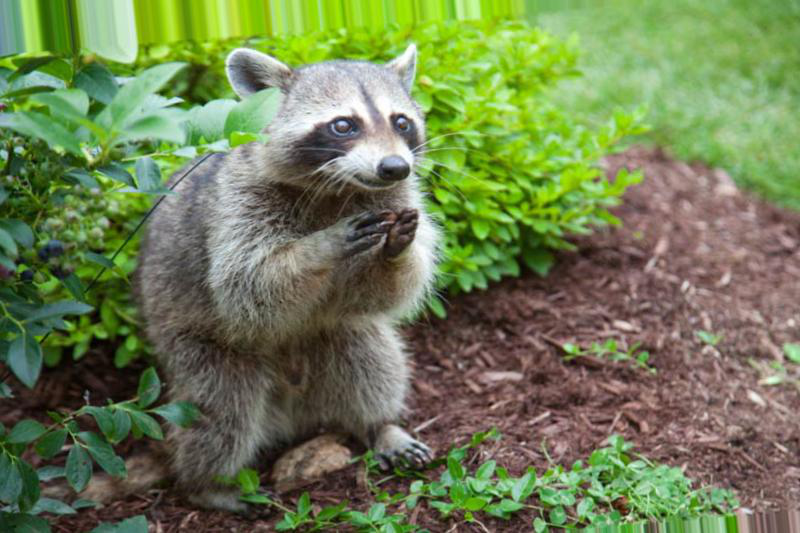

In [ ]:
tf.keras.preprocessing.image.load_img('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/train/NEW_RACCOON/RACCOON__0_414.jpeg')



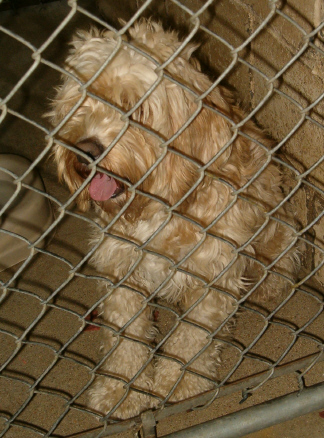

In [ ]:
#just for checking all data present
tf.keras.preprocessing.image.load_img('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/train/DOG/dog (3276).jpg')

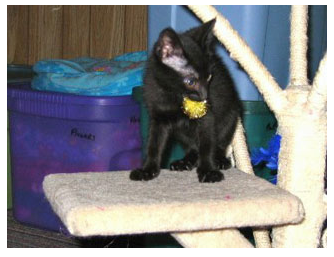

In [ ]:
tf.keras.preprocessing.image.load_img('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/train/CAT/cat (12).jpg')

In [ ]:
#as we can know there is 1000 dogs(decreased by deleting), 1000 cats(decreased by deleting), and 1000(used data augm yo increase from 160) raccoons images

#training_generator = ImageDataGenerator(rotation_range=20,
                              #  width_shift_range=0.2,
                              #  height_shift_range=0.2,
                              #  rescale=1/255,
                              #  shear_range=0.2,
                              #  zoom_range=0.2,
                              #  horizontal_flip=False,
                              #  fill_mode='nearest'
                              # )

#training_generator = ImageDataGenerator();
training_generator = ImageDataGenerator(rescale=1./255);
train_dataset = training_generator.flow_from_directory('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/train',
                                                        target_size = (128, 128),
                                                        batch_size = 8,
                                                        class_mode = 'categorical', #we will have 3 classes
                                                       shuffle = True);

Found 12874 images belonging to 3 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
train_dataset.class_indices

{'CAT': 0, 'DOG': 1, 'NEW_RACCOON': 2}

In [ ]:
# To test, we set this parameter to FALSE because when testing,
# the order of the images makes no difference.
# If we leave the value equals TRUE, we will not be able to associate the
# predictions with the expected outputs
#test_generator = ImageDataGenerator()
test_generator = ImageDataGenerator(rescale=1./255)

test_dataset = test_generator.flow_from_directory('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/test',
                                                     target_size = (128, 128), #same size
                                                     batch_size = 8, #take one by one
                                                     class_mode = 'categorical',
                                                     shuffle = False) # this is test set, we dont need to shuffle, we dont!
                                                     #if you shuffle the test data, your expected outputs and actual output order will be problematic

Found 4408 images belonging to 3 classes.


In [ ]:
# network = Sequential([
#         tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
#         tf.keras.layers.MaxPool2D(2,2),

#         tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#         tf.keras.layers.MaxPool2D(2,2),

#         tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#         tf.keras.layers.MaxPool2D(2,2),

#         tf.keras.layers.Flatten(),

#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(3, activation='softmax')
#     ])

network = Sequential([
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(128, 128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
    ])

In [ ]:
network.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 32)     

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#I would like to add early stop
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py
erl_stop = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)

In [ ]:
history= network.fit(train_dataset, epochs=50, callbacks=[erl_stop], validation_data=test_dataset)

Epoch 1/50
 742/1610 [============>.................] - ETA: 1:20:42 - loss: 1.0981 - accuracy: 0.3506

KeyboardInterrupt: ignored

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend(fontsize = "large")
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend()
    plt.show()

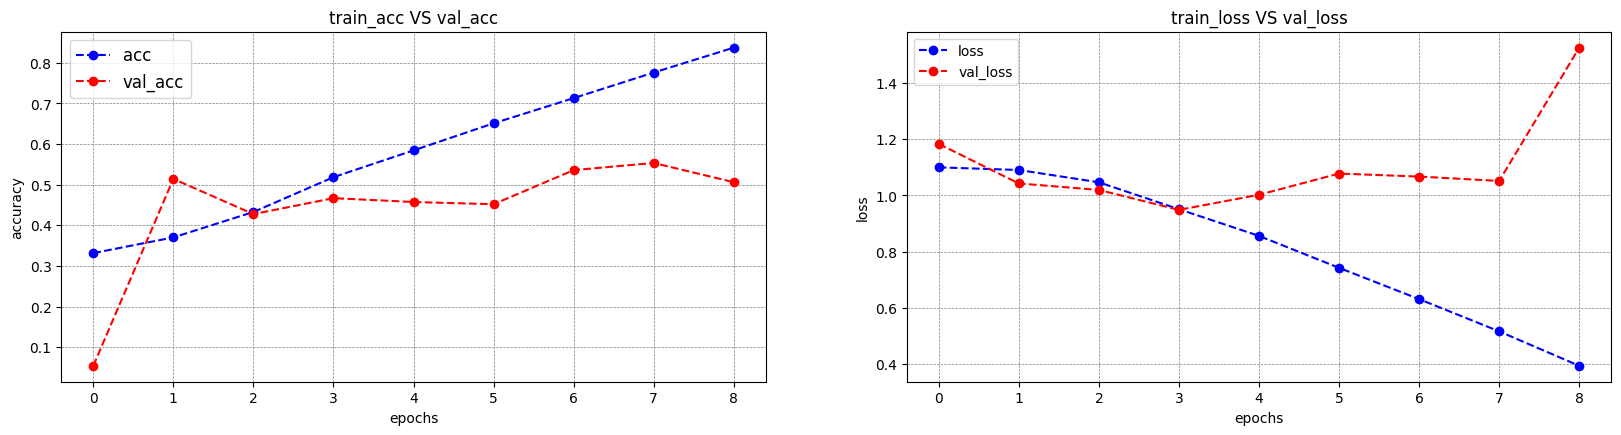

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_dataset.class_indices

{'CAT': 0, 'DOG': 1, 'RACCOON': 2}

In [ ]:
predictions = network.predict(test_dataset)
predictions

739/739 [==============================] - 2s 3ms/step


array([[0.8664726 , 0.10834976, 0.02517762],
       [0.3059645 , 0.31573564, 0.37829986],
       [0.7120041 , 0.27517325, 0.01282271],
       ...,
       [0.23134007, 0.47266096, 0.29599902],
       [0.35111502, 0.4001105 , 0.24877447],
       [0.3193721 , 0.31961608, 0.36101183]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,

In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.4668470906630582

In [ ]:
test_dataset.class_indices

{'CAT': 0, 'DOG': 1, 'RACCOON': 2}

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
cm2 = confusion_matrix(test_dataset.classes, predictions)
print(cm2)
print('\n')
print(classification_report(test_dataset.classes, predictions))

[[251  52  46]
 [218  72  60]
 [ 13   5  22]]


              precision    recall  f1-score   support

           0       0.52      0.72      0.60       349
           1       0.56      0.21      0.30       350
           2       0.17      0.55      0.26        40

    accuracy                           0.47       739
   macro avg       0.42      0.49      0.39       739
weighted avg       0.52      0.47      0.44       739



ValueError: ignored

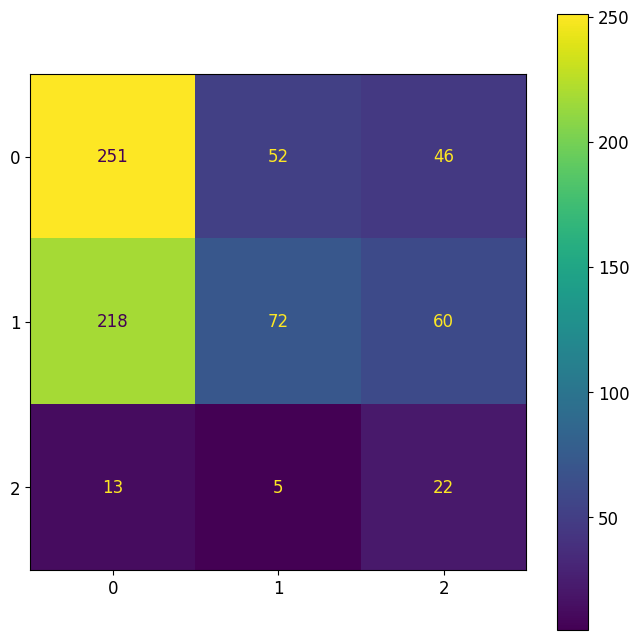

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
display_c_m = ConfusionMatrixDisplay(cm2, display_labels=test_dataset.classes)
display_c_m.plot()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#model_json = network.to_json()
#with open('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/network2.json','w') as json_file:
#   json_file.write(model_json)

In [ ]:
# from keras.models import save_model
# network_saved = save_model(network, '/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/raccoon.hdf5')

In [ ]:
# with open('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/network2.json', 'r') as json_file:
#   json_saved_model = json_file.read()
#   json_saved_model

In [ ]:
# network_loaded = tf.keras.models.model_from_json(json_saved_model)
# network_loaded.load_weights('weights2.hdf5')
# network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
image = cv2.imread('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/fozzy.jpg')

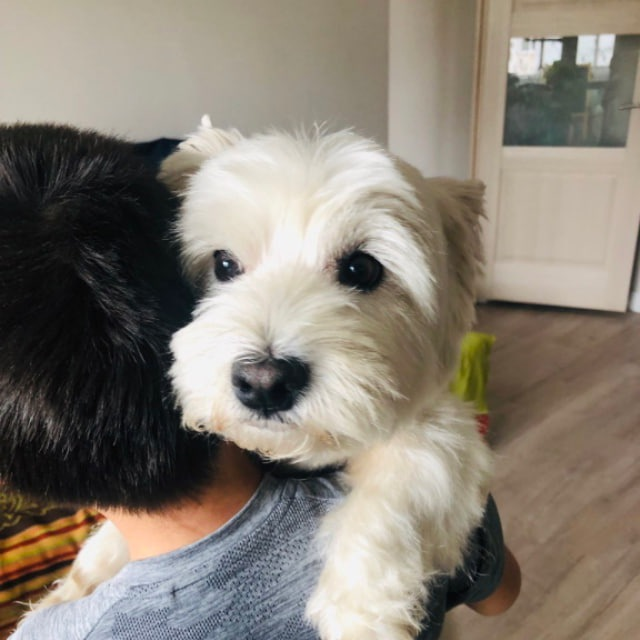

In [ ]:
cv2_imshow(image)

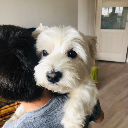

In [ ]:
image = cv2.resize(image, (128, 128))
cv2_imshow(image)

In [ ]:
image = image / 255  #scale this image
image

array([[[0.65882353, 0.71372549, 0.76078431],
        [0.65098039, 0.71372549, 0.76078431],
        [0.64313725, 0.71372549, 0.75686275],
        ...,
        [0.41568627, 0.52156863, 0.6       ],
        [0.41568627, 0.52941176, 0.61176471],
        [0.39215686, 0.51372549, 0.59607843]],

       [[0.65882353, 0.71372549, 0.76078431],
        [0.65882353, 0.71372549, 0.76078431],
        [0.65098039, 0.71372549, 0.76078431],
        ...,
        [0.43529412, 0.54117647, 0.61960784],
        [0.42745098, 0.54117647, 0.62352941],
        [0.42352941, 0.5372549 , 0.61960784]],

       [[0.6627451 , 0.71764706, 0.76470588],
        [0.6627451 , 0.71764706, 0.76470588],
        [0.6627451 , 0.7254902 , 0.75294118],
        ...,
        [0.44705882, 0.55686275, 0.62352941],
        [0.44313725, 0.54901961, 0.62745098],
        [0.42745098, 0.53333333, 0.61176471]],

       ...,

       [[0.03529412, 0.08627451, 0.21176471],
        [0.05490196, 0.10980392, 0.22352941],
        [0.11764706, 0

In [ ]:
image.shape

(128, 128, 3)

In [ ]:
image = image.reshape(-1, 128, 128, 3)
image.shape

(1, 128, 128, 3)

In [ ]:
result = model(image)
result

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.34617493, 0.32297936, 0.33084568]], dtype=float32)>

In [ ]:
result = np.argmax(result) #convert to human readable language!
result

0

In [ ]:
test_dataset.class_indices

{'CAT': 0, 'DOG': 1, 'RACCOON': 2}

In [ ]:
if result == 0:
  print('Cat')
elif result == 1:
  print('Dog')
else:
  print('Raccoon')


In [ ]:
image = cv2.imread('/content/drive/Othercomputers/Thinkpad/my folder/Ogul/week12/Dataset/CATS_DOGS_RACCOON/rocket.jpg')

In [ ]:
image = cv2.resize(image, (128, 128))
cv2_imshow(image)

In [ ]:
image = image / 255  #scale this image

In [ ]:
image.shape

In [ ]:
image = image.reshape(-1, 128, 128, 3)


In [ ]:
result = model(image)


In [ ]:
result = np.argmax(result)
result

In [ ]:
if result == 0:
  print('Cat')
elif result == 1:
  print('Dog')
else:
  print('Raccoon')